Point 1: Latitude: 47.989890558878, Longitude: -49.582207943559, Timestamp: 1751613205
Point 2: Latitude: 47.714660525243, Longitude: -48.653859138512, Timestamp: 1751613216
Point 3: Latitude: 47.405079323506, Longitude: -47.652913395511, Timestamp: 1751613228
Point 4: Latitude: 47.112924415849, Longitude: -46.746287276111, Timestamp: 1751613239
Point 5: Latitude: 46.785275896291, Longitude: -45.769207646679, Timestamp: 1751613251
Point 6: Latitude: 46.476921487766, Longitude: -44.884569396689, Timestamp: 1751613262
Point 7: Latitude: 46.131998758758, Longitude: -43.931564039683, Timestamp: 1751613274
Point 8: Latitude: 45.808170015518, Longitude: -43.069028091109, Timestamp: 1751613285
Point 9: Latitude: 45.477195659379, Longitude: -42.217063285164, Timestamp: 1751613296
Point 10: Latitude: 45.108171960932, Longitude: -41.299671629938, Timestamp: 1751613308
Point 11: Latitude: 44.762778708646, Longitude: -40.469718880195, Timestamp: 1751613319
Point 12: Latitude: 44.41073583474, Longi

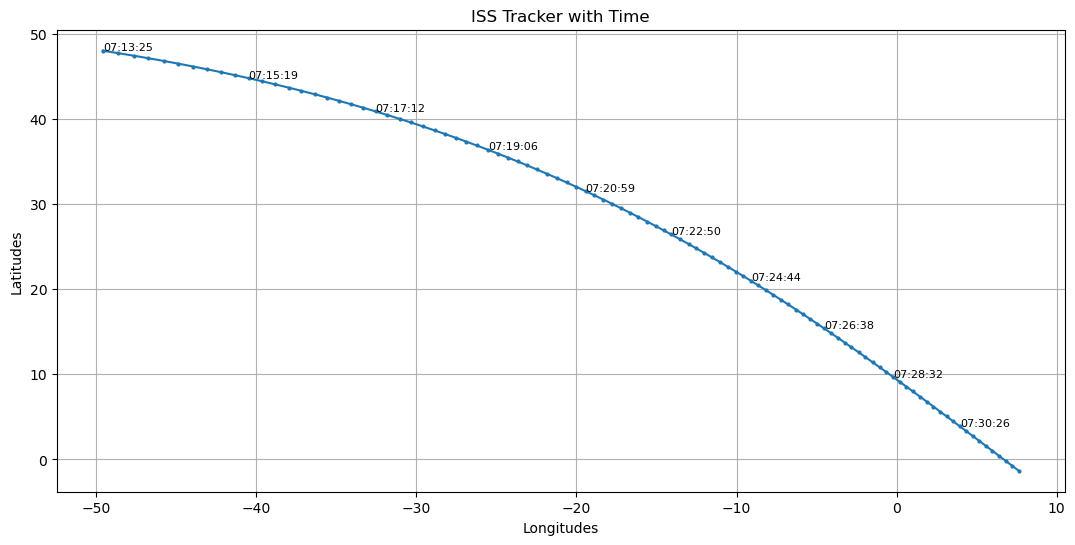

In [2]:
import requests
import time
import datetime

url = "https://api.wheretheiss.at/v1/satellites/25544"

longitudes = []
latitudes = []
timestamps = []

i = 0
while i < 100:
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200:
        latitude = data['latitude']
        longitude = data['longitude']
        timestamp = data['timestamp']

        latitudes.append(latitude)
        longitudes.append(longitude)
        timestamps.append (datetime.datetime.fromtimestamp(data['timestamp'], datetime.UTC).strftime("%H:%M:%S"))

        print("Point " + str(i+1) + ": Latitude: " + str(latitude) + ", Longitude: " + str(longitude) + ", Timestamp: " + str(timestamp))

        i += 1
    else: 
        print ("Failed to retrieve data point " + str(i + 1) + ".")

    time.sleep(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(13,6))
plt.plot(longitudes,latitudes, marker= 'o', markersize = 2)
plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.title("ISS Tracker with Time")
plt.grid(True)

for i in range(0,len(timestamps), 10):
    plt.text(longitudes[i], latitudes[i], timestamps[i], fontsize=8)

plt.show()